In [6]:
from tensorflow import keras
from keras.layers import Input, Dense as Input, Dense
from keras.models import Model as Model

encoding_dim = 32  

input_img = keras.layers.Input(shape=(784,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [8]:
encoder = keras.Model(input_img, encoded)

In [9]:
encoded_input = keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [18]:
autoencoder.compile(loss='binary_crossentropy')

In [19]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [20]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [21]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2380 - val_loss: 0.1654
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1469 - val_loss: 0.1313
Epoch 3/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1247 - val_loss: 0.1176
Epoch 4/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1143 - val_loss: 0.1097
Epoch 5/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1081 - val_loss: 0.1052
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1043 - val_loss: 0.1022
Epoch 7/50
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1017 - val_loss: 0.1008
Epoch 8/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1000 - val_loss: 0.1002
Epoch 9/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0988 - val_

In [22]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

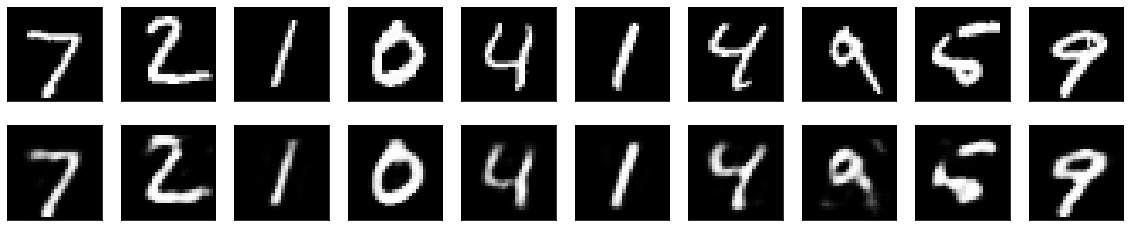

In [23]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()